In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Reading main datasets 

In [2]:
data_frames = {}
for file in os.listdir('./data/'):
     year = str(file).split('_')[-2]
     path = os.path.join('data',file,file+'.csv')
     df = pd.read_csv(path, delimiter = ',', parse_dates=[0], infer_datetime_format=True, na_values='0', header = None)
     print(path)
     data_frames['df_'+year] = df

C:\Users\lluis\AppData\Local\Temp\ipykernel_3412\3232558894.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(path, delimiter = ',', parse_dates=[0], infer_datetime_format=True, na_values='0', header = None)


data\dsc_fc_summed_spectra_2016_v01\dsc_fc_summed_spectra_2016_v01.csv


C:\Users\lluis\AppData\Local\Temp\ipykernel_3412\3232558894.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(path, delimiter = ',', parse_dates=[0], infer_datetime_format=True, na_values='0', header = None)


data\dsc_fc_summed_spectra_2017_v01\dsc_fc_summed_spectra_2017_v01.csv


C:\Users\lluis\AppData\Local\Temp\ipykernel_3412\3232558894.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(path, delimiter = ',', parse_dates=[0], infer_datetime_format=True, na_values='0', header = None)


data\dsc_fc_summed_spectra_2018_v01\dsc_fc_summed_spectra_2018_v01.csv


C:\Users\lluis\AppData\Local\Temp\ipykernel_3412\3232558894.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(path, delimiter = ',', parse_dates=[0], infer_datetime_format=True, na_values='0', header = None)


data\dsc_fc_summed_spectra_2019_v01\dsc_fc_summed_spectra_2019_v01.csv


C:\Users\lluis\AppData\Local\Temp\ipykernel_3412\3232558894.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(path, delimiter = ',', parse_dates=[0], infer_datetime_format=True, na_values='0', header = None)


data\dsc_fc_summed_spectra_2020_v01\dsc_fc_summed_spectra_2020_v01.csv


C:\Users\lluis\AppData\Local\Temp\ipykernel_3412\3232558894.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(path, delimiter = ',', parse_dates=[0], infer_datetime_format=True, na_values='0', header = None)


data\dsc_fc_summed_spectra_2021_v01\dsc_fc_summed_spectra_2021_v01.csv


C:\Users\lluis\AppData\Local\Temp\ipykernel_3412\3232558894.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(path, delimiter = ',', parse_dates=[0], infer_datetime_format=True, na_values='0', header = None)


data\dsc_fc_summed_spectra_2022_v01\dsc_fc_summed_spectra_2022_v01.csv


In [3]:
df16, df17,df18,df19,df20,df21,df22 = data_frames['df_2016'], data_frames['df_2017'], data_frames['df_2018'], data_frames['df_2019'], data_frames['df_2020'], data_frames['df_2021'], data_frames['df_2022']
df_final = pd.concat([df16,df17,df18,df19,df20,df21,df22])

In [4]:
df_final.rename({0:'date',1:'x',2:'y',3:'z'},inplace = True,axis =1)

### Reading indexs dataframe 

In [5]:
ind = pd.read_csv('./kpg.txt', delimiter=' ')
ind_filter = ind[(ind['YYYY']>=2016) & (ind['YYYY']<=2022)]
ind_filter.rename({'hh.h':'h'},axis=1,inplace = True)
ind_filter.head()

C:\Users\lluis\AppData\Local\Temp\ipykernel_3412\2585190920.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind_filter.rename({'hh.h':'h'},axis=1,inplace = True)


,YYYY,MM,DD,h,hh._m,days,days_m,Kp,ap,D
245448,2016,1,1,0.0,1.5,30681.000,30681.0625,6.000,80,1
245449,2016,1,1,3.0,4.5,30681.125,30681.1875,5.333,56,1
245450,2016,1,1,6.0,7.5,30681.250,30681.3125,5.000,48,1
245451,2016,1,1,9.0,10.5,30681.375,30681.4375,3.333,18,1
245452,2016,1,1,12.0,13.5,30681.500,30681.5625,1.667,6,1


## Checking nulls 

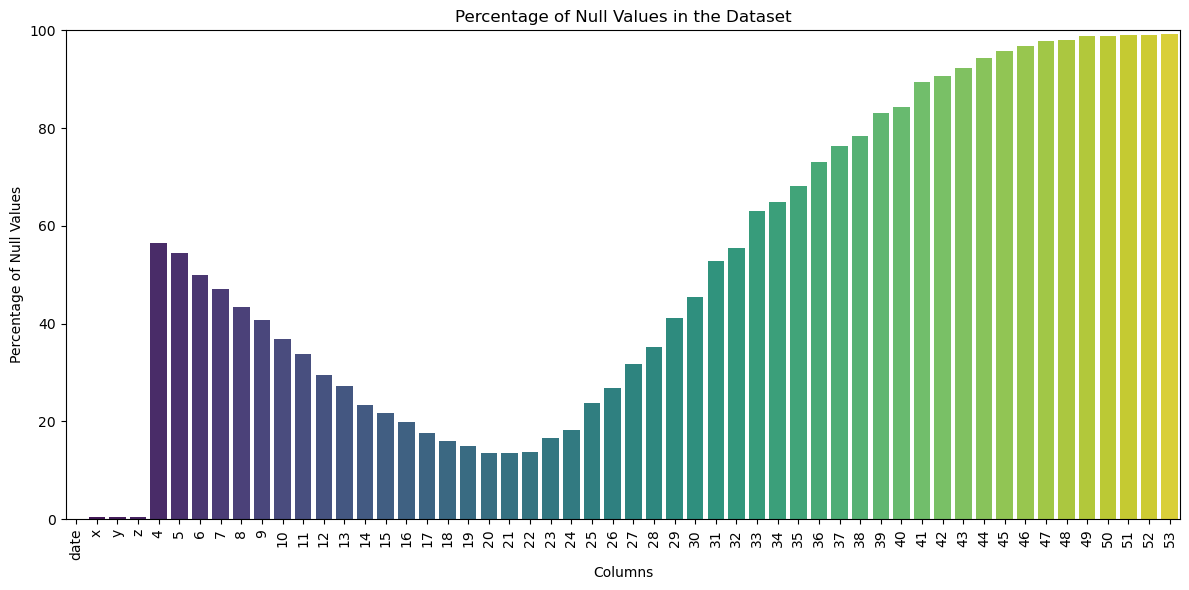

In [6]:
null_percentage = (df_final.isnull().sum() / len(df_final)) * 100

# Create a bar plot of null value percentages
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
ax = sns.barplot(x=null_percentage.index, y=null_percentage.values, palette="viridis")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel("Columns")
plt.ylabel("Percentage of Null Values")
plt.title("Percentage of Null Values in the Dataset")

# Set the y-axis scale from 0 to 100
plt.ylim(0, 100)

plt.tight_layout()

# Show the plot
plt.show()

In [7]:
for k in data_frames:
    num_nulls = data_frames[k].isnull().sum().sum()
    print(k,'has a total of',num_nulls/data_frames[k].shape[0],'% (',num_nulls,') nulls')

df_2016 has a total of 30.86239777213762 % ( 8755045 ) nulls
df_2017 has a total of 30.70994101978691 % ( 16141145 ) nulls
df_2018 has a total of 31.242830280011916 % ( 16781149 ) nulls
df_2019 has a total of 31.24171738451935 % ( 8007877 ) nulls
df_2020 has a total of 28.850437656305825 % ( 12920380 ) nulls
df_2021 has a total of 23.672530441400305 % ( 12442282 ) nulls
df_2022 has a total of 20.29900494672755 % ( 10669157 ) nulls


## Merging dataframes

In [7]:
# df_final['date'] = pd.to_datetime(df_final['date'])

# # Calculate the time interval (90 minutes) in seconds
# interval = pd.Timedelta(minutes=180).total_seconds()

# # Create a custom grouping column based on time intervals
# df_final['group'] = (df_final['date'].sub(df_final['date'].min()).dt.total_seconds() / interval).astype(int)

# # Group the DataFrame by the custom 'group' column and calculate the mean for each group
# df_grouped = df_final.groupby('group').mean()

# # Reset the index to have the 'group' as a regular column again if needed
# df_grouped.reset_index(inplace=True)

# # Display the resulting DataFrame
# df_grouped

In [8]:
def truncateHour(x):
    if x< 3:
        return 0
    elif x< 6:
        return 3
    elif x < 9:
        return 6
    elif x< 12:
        return 9
    elif x< 15:
        return 12
    elif x< 18:
        return 15
    elif x< 21:
        return 18
    else:
        return 21

In [10]:
df_final['YYYY'] = df_final['date'].dt.year
df_final['MM'] = df_final['date'].dt.month
df_final['DD'] = df_final['date'].dt.day
df_final['h'] = df_final['date'].dt.hour
df_final['h'] = df_final['h'].apply(truncateHour)

In [15]:
df_final.head(180)

,date,x,y,z,4,5,6,7,8,9,...,48,49,50,51,52,53,YYYY,MM,DD,h
0,2016-01-01 00:00:00,6.83609,-3.379340,-12.9205,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2016,1,1,0
1,2016-01-01 00:01:00,6.76732,-3.301940,-12.9967,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2016,1,1,0
2,2016-01-01 00:02:00,6.39107,-2.611730,-13.3271,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2016,1,1,0
3,2016-01-01 00:03:00,6.44897,-2.615250,-13.3299,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2016,1,1,0
4,2016-01-01 00:04:00,6.58758,-2.730820,-13.2361,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2016,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2016-01-01 02:55:00,2.80987,0.072707,-13.1230,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2016,1,1,0
176,2016-01-01 02:56:00,2.90330,0.176012,-13.0506,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2016,1,1,0
177,2016-01-01 02:57:00,2.96329,0.333369,-13.1096,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2016,1,1,0
178,2016-01-01 02:58:00,2.83112,0.078324,-13.1435,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2016,1,1,0


In [16]:
df_grouped = df_final.groupby(['YYYY','MM','DD','h']).mean()

In [17]:
df_grouped

date         x         y          z           4  \
YYYY MM DD h                                                                   
2016 1  1  0  2016-01-01 01:29:30  4.433160 -1.247880 -13.165854         NaN   
           3  2016-01-01 04:29:30  3.448769 -3.864323  -8.984068  139.338250   
           6  2016-01-01 07:29:30  4.407694 -5.729229  -6.420560  143.819967   
           9  2016-01-01 10:29:30  3.758710 -6.973925   3.080465         NaN   
           12 2016-01-01 13:29:30  6.514989 -6.250111  -0.786576  142.064460   
...                           ...       ...       ...        ...         ...   
2022 12 31 9  2022-12-31 10:29:30 -4.575782  1.086207   2.755094   20.038541   
           12 2022-12-31 13:29:30 -2.912565  0.545443  -1.746772   25.665688   
           15 2022-12-31 16:29:30 -3.569145  2.629413   0.167908   32.373597   
           18 2022-12-31 19:29:30 -4.063840  1.834405  -1.244176   24.981998   
           21 2022-12-31 22:29:30 -4.004869  1.863977  -0.416700   24.341184   

                        5           6           7           8           9  \
YYYY MM DD h                                                                
2016 1  1  0          NaN         NaN         NaN         NaN         NaN   
           3   108.341150  131.678031  127.960636  124.528562  108.572063   
           6   103.094027  126.340200  129.495920  124.643217   96.828230   
           9          NaN         NaN         NaN         NaN         NaN   
           12  102.750320  127.700920  130.539498  124.235998   73.482044   
...                   ...         ...         ...         ...         ...   
2022 12 31 9     0.253126    2.232621   10.446358   12.015030    1.288711   
           12    0.231726    0.301693    7.798967   15.294495    0.234433   
           15    0.231726    0.533728   11.987406   18.079204    0.313125   
           18    0.231726    0.869348   12.322342   12.377256    0.253563   
           21    0.231726    0.497367    3.097159    9.419372    0.248380   

               ...          44          45          46          47  \
YYYY MM DD h   ...                                                   
2016 1  1  0   ...         NaN         NaN         NaN         NaN   
           3   ...  161.363000  134.080562  151.425344  140.448156   
           6   ...  163.193200  131.601167  151.214300  144.231933   
           9   ...         NaN         NaN         NaN         NaN   
           12  ...  162.297380  133.708920  152.504700  142.948180   
...            ...         ...         ...         ...         ...   
2022 12 31 9   ...         NaN         NaN         NaN         NaN   
           12  ...  372.433667  295.602368  362.085000         NaN   
           15  ...  351.656905  288.231412  386.202500         NaN   
           18  ...  316.262016  291.814545  388.993750         NaN   
           21  ...  339.274714  277.562000         NaN         NaN   

                       48          49          50          51          52  \
YYYY MM DD h                                                                
2016 1  1  0          NaN         NaN         NaN         NaN         NaN   
           3   132.193750  151.046906  151.407406  134.467309  162.754562   
           6   129.541733  147.492067  156.671133  137.356233  158.362867   
           9          NaN         NaN         NaN         NaN         NaN   
           12  129.320420  148.748020  156.235200  136.425440  159.369940   
...                   ...         ...         ...         ...         ...   
2022 12 31 9          NaN         NaN         NaN         NaN         NaN   
           12         NaN         NaN         NaN         NaN         NaN   
           15         NaN         NaN         NaN         NaN         NaN   
           18         NaN         NaN         NaN         NaN         NaN   
           21         NaN         NaN         NaN         NaN         NaN   

                       53  
YYYY MM DD h               
2016 1  1  0     

In [20]:
merged_df = pd.merge(df_grouped, ind_filter, on=['YYYY', 'DD', 'MM', 'h'], how='inner')
merged_df.head()

,YYYY,DD,MM,h,date,x,y,z,4,5,...,50,51,52,53,hh._m,days,days_m,Kp,ap,D
0,2016,1,1,0,2016-01-01 01:29:30,4.433160,-1.247880,-13.165854,NaN,NaN,...,NaN,NaN,NaN,NaN,1.5,30681.000,30681.0625,6.000,80,1
1,2016,1,1,3,2016-01-01 04:29:30,3.448769,-3.864323,-8.984068,139.338250,108.341150,...,151.407406,134.467309,162.754562,142.775667,4.5,30681.125,30681.1875,5.333,56,1
2,2016,1,1,6,2016-01-01 07:29:30,4.407694,-5.729229,-6.420560,143.819967,103.094027,...,156.671133,137.356233,158.362867,144.435267,7.5,30681.250,30681.3125,5.000,48,1
3,2016,1,1,9,2016-01-01 10:29:30,3.758710,-6.973925,3.080465,NaN,NaN,...,NaN,NaN,NaN,NaN,10.5,30681.375,30681.4375,3.333,18,1
4,2016,1,1,12,2016-01-01 13:29:30,6.514989,-6.250111,-0.786576,142.064460,102.750320,...,156.235200,136.425440,159.369940,145.061380,13.5,30681.500,30681.5625,1.667,6,1


In [21]:
merged_df.head()

,YYYY,DD,MM,h,date,x,y,z,4,5,...,50,51,52,53,hh._m,days,days_m,Kp,ap,D
0,2016,1,1,0,2016-01-01 01:29:30,4.433160,-1.247880,-13.165854,NaN,NaN,...,NaN,NaN,NaN,NaN,1.5,30681.000,30681.0625,6.000,80,1
1,2016,1,1,3,2016-01-01 04:29:30,3.448769,-3.864323,-8.984068,139.338250,108.341150,...,151.407406,134.467309,162.754562,142.775667,4.5,30681.125,30681.1875,5.333,56,1
2,2016,1,1,6,2016-01-01 07:29:30,4.407694,-5.729229,-6.420560,143.819967,103.094027,...,156.671133,137.356233,158.362867,144.435267,7.5,30681.250,30681.3125,5.000,48,1
3,2016,1,1,9,2016-01-01 10:29:30,3.758710,-6.973925,3.080465,NaN,NaN,...,NaN,NaN,NaN,NaN,10.5,30681.375,30681.4375,3.333,18,1
4,2016,1,1,12,2016-01-01 13:29:30,6.514989,-6.250111,-0.786576,142.064460,102.750320,...,156.235200,136.425440,159.369940,145.061380,13.5,30681.500,30681.5625,1.667,6,1


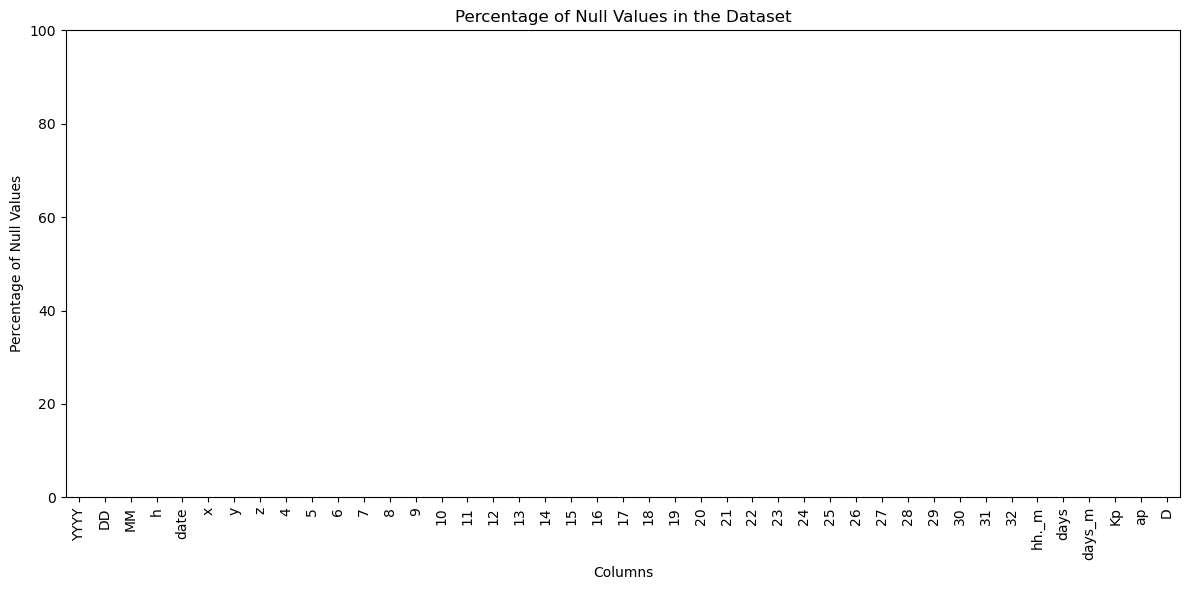

In [50]:
null_percentage = (filtered_df.isnull().sum() / len(filtered_df)) * 100

# Create a bar plot of null value percentages
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
ax = sns.barplot(x=null_percentage.index, y=null_percentage.values, palette="viridis")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel("Columns")
plt.ylabel("Percentage of Null Values")
plt.title("Percentage of Null Values in the Dataset")

# Set the y-axis scale from 0 to 100
plt.ylim(0, 100)

plt.tight_layout()

# Show the plot
plt.show()

In [44]:
filtered_df.isnull().sum()

YYYY         0
DD           0
MM           0
h            0
date         0
x           42
y           42
z           42
4         8843
5         8313
6         7456
7         6820
8         6152
9         5522
10        4890
11        4310
12        3719
13        3287
14        2820
15        2514
16        2206
17        1915
18        1679
19        1463
20        1212
21        1099
22        1037
23        1315
24        1522
25        2276
26        2674
27        3436
28        4020
29        4964
30        5710
31        6938
32        7411
hh._m        0
days         0
days_m       0
Kp           0
ap           0
D            0
dtype: int64

In [46]:
filtered_df.columns[5:37]

Index(['x', 'y', 'z',   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  32],
      dtype='object')

In [30]:
filtered_df = merged_df.drop(merged_df.columns[37:58],axis=1)

In [35]:
from sklearn.impute import KNNImputer
inputer = KNNImputer(n_neighbors=4)

In [59]:
filtered_df.columns = filtered_df.columns.astype(str)
columns_with_missing = filtered_df.columns[filtered_df.isnull().any()]

df_missing = filtered_df[columns_with_missing]
df_non_missing = filtered_df.drop(columns=columns_with_missing)

# Initialize the KNNImputer (you can specify the number of neighbors 'n_neighbors')
imputer = KNNImputer(n_neighbors=4)

# Fit the imputer on non-missing data and transform the missing data
df_missing_imputed = pd.DataFrame(imputer.fit_transform(df_non_missing), columns=df_non_missing.columns)

# Combine the imputed data with the non-missing data
df_imputed = pd.concat([df_missing_imputed, df_missing], axis=1)

TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[int32]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>)

In [53]:
merged_df.columns

Index([  'YYYY',     'DD',     'MM',      'h',   'date',      'x',      'y',
            'z',        4,        5,        6,        7,        8,        9,
             10,       11,       12,       13,       14,       15,       16,
             17,       18,       19,       20,       21,       22,       23,
             24,       25,       26,       27,       28,       29,       30,
             31,       32,       33,       34,       35,       36,       37,
             38,       39,       40,       41,       42,       43,       44,
             45,       46,       47,       48,       49,       50,       51,
             52,       53,  'hh._m',   'days', 'days_m',     'Kp',     'ap',
            'D'],
      dtype='object')

In [54]:
filte= merged_df.drop(['hh._m','days','days_m','date','YYYY','DD','MM','h','D'],axis=1)

In [55]:
merged_df

,x,y,z,4,5,6,7,8,9,10,...,46,47,48,49,50,51,52,53,Kp,ap
0,4.433160,-1.247880,-13.165854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000,80
1,3.448769,-3.864323,-8.984068,139.338250,108.341150,131.678031,127.960636,124.528562,108.572063,108.378163,...,151.425344,140.448156,132.193750,151.046906,151.407406,134.467309,162.754562,142.775667,5.333,56
2,4.407694,-5.729229,-6.420560,143.819967,103.094027,126.340200,129.495920,124.643217,96.828230,90.773630,...,151.214300,144.231933,129.541733,147.492067,156.671133,137.356233,158.362867,144.435267,5.000,48
3,3.758710,-6.973925,3.080465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.333,18
4,6.514989,-6.250111,-0.786576,142.064460,102.750320,127.700920,130.539498,124.235998,73.482044,79.054954,...,152.504700,142.948180,129.320420,148.748020,156.235200,136.425440,159.369940,145.061380,1.667,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17163,-4.575782,1.086207,2.755094,20.038541,0.253126,2.232621,10.446358,12.015030,1.288711,3.908098,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.667,6
17164,-2.912565,0.545443,-1.746772,25.665688,0.231726,0.301693,7.798967,15.294495,0.234433,0.590340,...,362.085000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000,15
17165,-3.569145,2.629413,0.167908,32.373597,0.231726,0.533728,11.987406,18.079204,0.313125,4.004449,...,386.202500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.667,12
17166,-4.063840,1.834405,-1.244176,24.981998,0.231726,0.869348,12.322342,12.377256,0.253563,5.782082,...,388.993750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.333,18


In [60]:
non_na = filtered_df.dropna()